# Practicum: Bibliographic Data and Borrowing Records, continued


### Agenda

- What is a CSV? What is bibliographic data? 
    - Case Study: Reconstructing missing data
    - Case Study: Princeton library catalog records for *Jane Eyre*
- Review Research Exercise #4
- In-class Exercises: 
    - Practicing working with bibliographic data in Python
    - Make a time series visualization using `groupby()` and `plot()`

## What is a CSV? What is bibliographic data?


### Case Study: Carolyn Bressey's work mapping the geographies of readers of *Anti-Caste*

### Case Study: Princeton library catalog records for *Jane Eyre*

## Review Research Exercise



- How was the research exercise?
- Questions?
- What did you find in working with the Seattle Public Library Dataset?
- Anything else?


## In-Class Exercises (35 min)

In pairs, work through the following Exercises 1-6 (scroll all the way to the bottom for 6).

### Practicing working with bibliographic data in Python
### Exercise 1
Import the `pandas` library.
Load in the CSV file from the Seattle Public Library. 

> (Make sure to load it in using the `parse_dates=[[[['CheckoutYear', 'CheckoutMonth' ]]` flag that we used in our research exercise. This combines the CheckoutYear and CheckoutMonth column into a single date, making it easier sort through if we're interested in month-level data.)

Using the commands we've learned so far, figure out what were the top 20 most-checked-out ***copies** of books in June 2015.


In [ ]:
### Your code here

### Excercise 2
Now, figure out what were the top 20 most-checked-out ***titles*** in June 2015 (remember, the Seattle Public Library has multiple copies of many of these works!) 

In [ ]:
### Your code here

### Excercise 3 
Now, figure out who the top 20 most-checked-out authors were in June 2015 (remember, many of these authors wrote mutiple works!)

In [ ]:
### Your code here

### Exercise 4
Make a bar plot of your results for top 20 most-checked-out authors in June 2015 (don't forget to include a title explaining what your graph is showing!)


In [ ]:
### Your code here

### Exercise 5
Compare your results for top 20 most-checked-out authors in June 2015 to the top 20 most-checked-out-authors overall in our 2010-2015 corpus. (You can make two bar graphs)

In [ ]:
### Your code here

____

###  Make a time series visualization using `groupby()` and `plot()`

In this next exercise we're going to learn how to make a time series visualization.


In [116]:
# Import our modules
import pandas as pd
seattle_library_df = pd.read_csv('../_datasets/Seattle_Book_Checkouts_2010_2015.csv', delimiter=",", parse_dates=[['CheckoutYear', 'CheckoutMonth' ]])

We might have noticed that one of the most frequently chekced out books in this period is Gillian Flynn's *Gone Girl.*  When and how often was this title and other work by Flynn checked out of the library?

Let's start by creating a data subset with just checkouts of work by Flynn

In [ ]:
#Create a datasubsett of Gillian Flynn works
flynn_seattle_library_df = seattle_library_df[seattle_library_df['Author'].str.contains('Flynn, Gillian', na=False)]

In [118]:
# Let's take a quick peek
flynn_seattle_library_df

,CheckoutYear_CheckoutMonth,Checkouts,Title,Author,Subjects,Publisher,PublicationYear
16280,2010-03-01,23,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.
16281,2010-01-01,22,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.
16282,2010-06-01,19,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.
16283,2010-05-01,18,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.
16284,2010-07-01,18,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.
...,...,...,...,...,...,...,...
382591,2015-05-01,11,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.
382592,2015-05-01,11,Gone girl [text (large print)] / Gillian Flynn.,"Flynn, Gillian, 1971-","Husbands Fiction, Married people Fiction, Wive...","Thorndike Press,",2012
382593,2015-06-01,11,Gone girl [text (large print)] / Gillian Flynn.,"Flynn, Gillian, 1971-","Husbands Fiction, Married people Fiction, Wive...","Thorndike Press,",2012
382594,2015-04-01,10,Dark places / Gillian Flynn.,"Flynn, Gillian, 1971-","Children of murder victims Fiction, Families C...","Shaye Areheart Books,",c2009.


In [119]:
# We're going to set our dates column as the index using the `.set_index()` function, 
# This will make it easier to make plot our data over successive intervals of time.
flynn_seattle_library_df.set_index('CheckoutYear_CheckoutMonth', inplace=True)

Title
Dark places / Gillian Flynn.                       AxesSubplot(0.125,0.2;0.775x0.68)
Gone girl : a novel / Gillian Flynn.               AxesSubplot(0.125,0.2;0.775x0.68)
Gone girl [text (large print)] / Gillian Flynn.    AxesSubplot(0.125,0.2;0.775x0.68)
Sharp objects : a novel / Gillian Flynn.           AxesSubplot(0.125,0.2;0.775x0.68)
Name: Checkouts, dtype: object

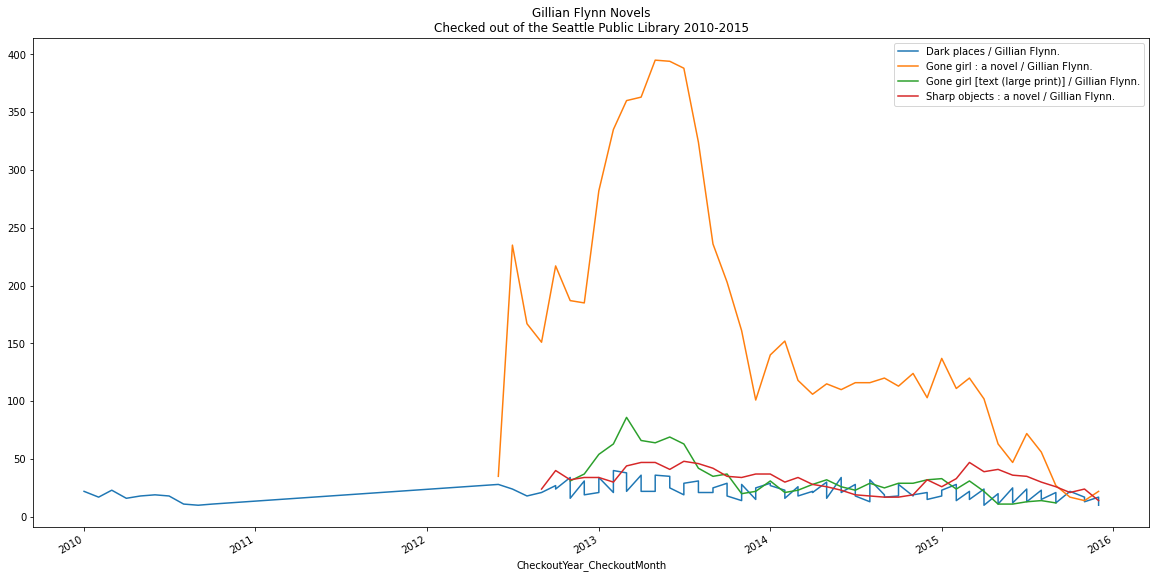

In [114]:
# Group data by 'Title' and display 'Checkouts' as line chart
flynn_seattle_library_df.groupby('Title')['Checkouts'].plot(kind='line', legend=True,\
                                                            figsize=(20,10),\
                                                            title="Gillian Flynn Novels\nChecked out of the Seattle Public Library 2010-2015",)

### Exercise 6
Your turn!

+ Choose an author of your choice. 
+ Create a data subset of their work
+ Set the date column of your subset as the index
+ Use `groupby()` and `plot()` to create a time series visualization comparing how often different titles were checked out by your author.

In [ ]:
### Your code here